In [11]:
%matplotlib inline
from matplotlib import pylab as plt
from ipywidgets import interact
import ipywidgets as widgets

In [1]:
from geonotebook.wrappers import RasterDataCollection
import os

In [2]:
DATA_DIR="/data/kotfic/NEX/golden_tile_layer/WELD/golden_tiles/geotiff/NBAR/"

In [3]:
def sort_NBAR(a, b):
  am, ay = int(a.split(".")[2][-2:]), int(a.split(".")[3])
  bm, by = int(b.split(".")[2][-2:]), int(b.split(".")[3])

  if ay < by:
    return -1
  elif ay > by:
    return 1
  elif by == ay:
    if am < bm:
      return -1
    elif am > bm:
      return 1
    else:
      return 0
  

PATHS = [DATA_DIR + p for p in sorted(os.listdir(DATA_DIR), sort_NBAR)]

In [4]:
rdc = RasterDataCollection(PATHS)

In [12]:
rdc[0]

In [13]:
rdc[0].bands[4].get_data()

array([[ -9.99900000e+03,   5.44000007e-02,   5.99999987e-02, ...,
         -9.99900000e+03,  -9.99900000e+03,  -9.99900000e+03],
       [ -9.99900000e+03,  -9.99900000e+03,  -9.99900000e+03, ...,
         -9.99900000e+03,  -9.99900000e+03,  -9.99900000e+03],
       [ -9.99900000e+03,  -9.99900000e+03,  -9.99900000e+03, ...,
         -9.99900000e+03,  -9.99900000e+03,  -9.99900000e+03],
       ..., 
       [ -9.99900000e+03,  -9.99900000e+03,  -9.99900000e+03, ...,
         -9.99900000e+03,  -9.99900000e+03,  -9.99900000e+03],
       [ -9.99900000e+03,  -9.99900000e+03,  -9.99900000e+03, ...,
         -9.99900000e+03,  -9.99900000e+03,  -9.99900000e+03],
       [ -9.99900000e+03,  -9.99900000e+03,  -9.99900000e+03, ...,
          7.15999976e-02,  -9.99900000e+03,  -9.99900000e+03]], dtype=float32)

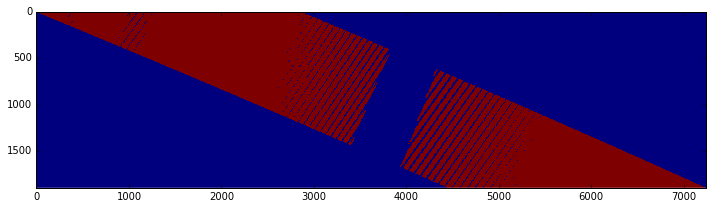

In [15]:
from skimage.exposure import rescale_intensity
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(rescale_intensity(rdc[0].bands[4].get_data()), interpolation='none')